# What makes movie most profitable? Let's find out today within this project

In [2]:
#Import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)    #Adjust the configuration of the plots we will create

# Exploratory data analysis

In [3]:
#Import the dataset

df=pd.read_csv(r"C:\Users\huong\OneDrive\Máy tính\4. JOB RELATED MATTERS\Python\Portfolio Project\movies.csv")

In [4]:
#Let's look at 5 first lines of dataset

df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Data cleaning

1. Missing values

In [5]:
#Check if any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}-{}%'.format(col, pct_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0005216484089723526%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [6]:
#Since the percentage of missing data is not huge, we will drop rows with
#missing values in 'votes','budget','gross'

df = df.dropna(how='any',subset=['votes','budget','gross'])
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [8]:
df.shape

#after dropping rows, we secure 5435rows which is 71% of original dataset


(5435, 15)

2.Change data types of 'budget' and 'gross'

In [9]:
#Check data types of each variable

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [12]:
#Change data type for 'budget' and 'gross' to make them full numer without decimal

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')


In [13]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


3. Create a new column for releasing year as existing one is not correct

In [14]:
#Create a column for correct year

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [16]:
df.head(15)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,1980
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,1980
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,1980
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,1980


In [17]:
#Sort the dataset by gross figure

df.sort_values(by=['gross'],inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


4. Check outliers

<AxesSubplot:>

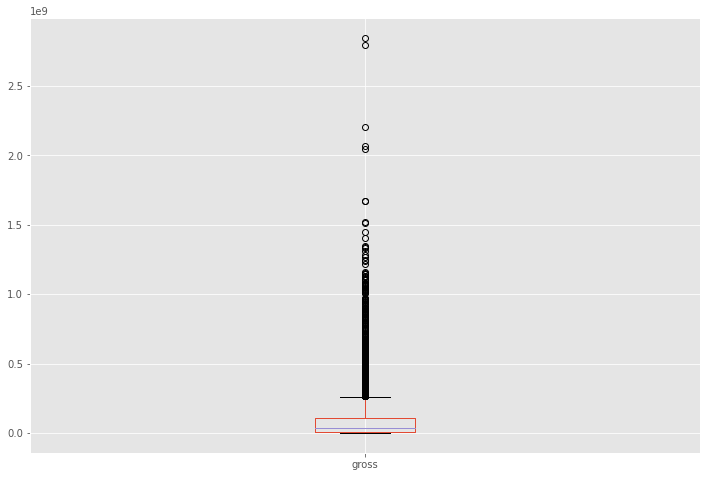

In [19]:
#Check if any outlier using boxplot

df.boxplot(column=['gross'])

5.Check and remove duplicates (if any)

In [20]:
#Check if there is any duplicates and drop them

df['company'].drop_duplicates().sort_values(ascending=False)

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7646,The Invisible Man,R,Drama,2020,"February 28, 2020 (United States)",7.1,186000,Leigh Whannell,Leigh Whannell,Elisabeth Moss,Canada,7000000,143151000,Universal Pictures,124.0,2020
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


# Correlation between variables

1. Numeric variables

<AxesSubplot:xlabel='gross', ylabel='budget'>

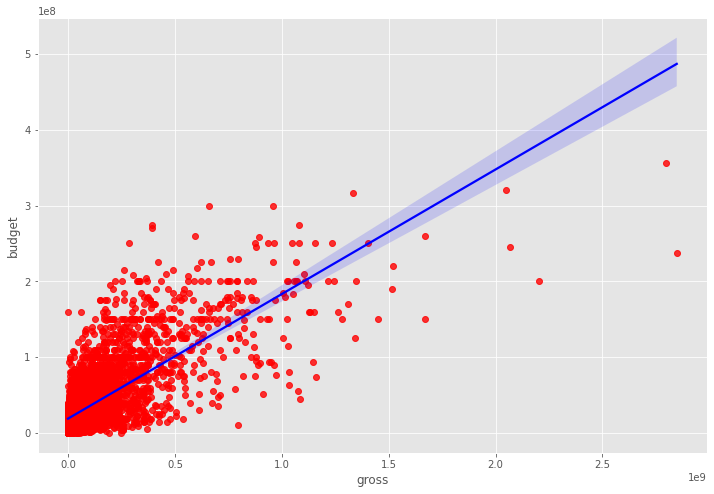

In [21]:
#Visuals the relationship between gross and buget

sns.regplot(x='gross', y='budget', data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})

In [22]:
#Correlation matrix between all numeric variables using Pearson

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.055457,0.205925,0.327137,0.274111,0.074351,0.998640
score,0.055457,1.000000,0.473793,0.072378,0.222284,0.414552,0.061311
votes,0.205925,0.473793,1.000000,0.440687,0.614991,0.352421,0.203048
budget,0.327137,0.072378,0.440687,1.000000,0.740729,0.319172,0.319599
gross,0.274111,0.222284,0.614991,0.740729,1.000000,0.275670,0.268472
runtime,0.074351,0.414552,0.352421,0.319172,0.275670,1.000000,0.074579
yearcorrect,0.998640,0.061311,0.203048,0.319599,0.268472,0.074579,1.000000


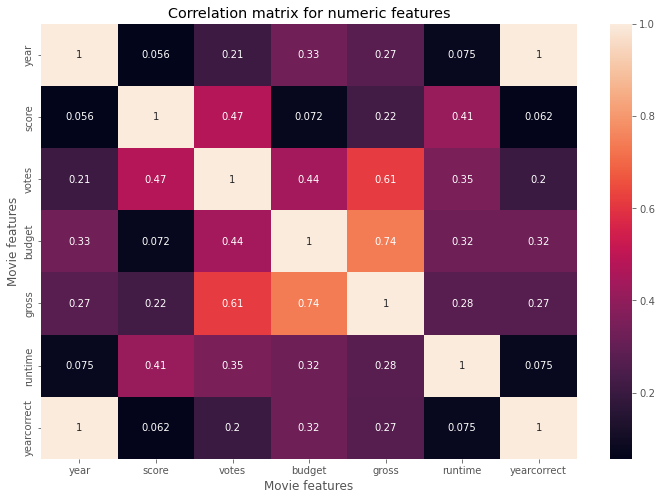

In [43]:
#Create heatmap between numeric variables

correlation_matrix=df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation matrix for numeric features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [23]:
#As can be seen from heatmap and correlation matrix, there is a high correlation
#between gross and votes; or between gross and budget. It is a positive relationship


2. Categorical variables

In [24]:
#We use for loop to randomly assign numeric values to each catogorical values

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,4705,6,6,1980,1308,8.4,927000,1800,2841,700,46,19000000,46998772,1432,146.0,1980
1,3942,6,1,1980,1131,5.8,65000,1581,1160,215,47,4500000,58853106,454,104.0,1980
2,3653,4,0,1980,1363,8.7,1200000,759,1822,1161,47,18000000,538375067,949,124.0,1980
3,205,4,4,1980,1131,7.7,221000,891,1416,1478,47,3500000,83453539,1114,88.0,1980
4,734,6,4,1980,1174,7.3,108000,721,352,272,47,6000000,39846344,1089,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7646,4321,6,6,2020,800,7.1,186000,1166,1825,499,6,7000000,143151000,1403,124.0,2020
7648,416,6,0,2020,907,6.6,140000,17,2397,1819,47,90000000,426505244,454,124.0,2020
7649,3568,4,0,2020,715,6.5,102000,854,2316,148,47,85000000,319715683,1114,99.0,2020
7651,3991,4,1,2020,760,6.8,42000,296,2096,641,6,135000000,111105497,12,100.0,2020


In [25]:
#Then, again, running correlation matrix to check relationship between variables

df_numerized.corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.023223,0.009459,0.024759,-0.005994,0.014814,0.012854,0.013930,0.011836,-0.006927,-0.024496,0.024328,0.006103,0.021417,0.010730,0.025054
rating,-0.023223,1.000000,0.127939,0.023045,0.018730,0.059387,0.009185,0.015114,-0.006650,0.003952,0.020223,-0.186401,-0.168683,-0.081968,0.133173,0.024008
genre,0.009459,0.127939,1.000000,-0.072768,0.021630,0.033931,-0.136523,-0.009102,0.017716,0.002785,-0.010792,-0.368762,-0.244286,-0.073121,-0.060256,-0.068591
year,0.024759,0.023045,-0.072768,1.000000,-0.001316,0.055457,0.205925,-0.037350,-0.024996,-0.033108,-0.066791,0.327137,0.274111,-0.013432,0.074351,0.998640
released,-0.005994,0.018730,0.021630,-0.001316,1.000000,0.046351,0.028998,0.003459,0.008638,0.015461,-0.017199,0.020226,0.008687,-0.002820,0.008582,-0.005463
score,0.014814,0.059387,0.033931,0.055457,0.046351,1.000000,0.473793,0.005763,0.013061,0.009276,-0.044641,0.072378,0.222284,0.021231,0.414552,0.061311
votes,0.012854,0.009185,-0.136523,0.205925,0.028998,0.473793,1.000000,-0.010122,-0.005314,-0.017079,0.042168,0.440687,0.614991,0.119452,0.352421,0.203048
director,0.013930,0.015114,-0.009102,-0.037350,0.003459,0.005763,-0.010122,1.000000,0.262720,0.036065,0.011031,-0.010119,-0.029546,-0.007600,0.018175,-0.036691
writer,0.011836,-0.006650,0.017716,-0.024996,0.008638,0.013061,-0.005314,0.262720,1.000000,0.019034,0.022075,-0.040271,-0.036189,-0.002932,-0.016580,-0.024821
star,-0.006927,0.003952,0.002785,-0.033108,0.015461,0.009276,-0.017079,0.036065,0.019034,1.000000,-0.010200,-0.021932,-0.000152,0.014877,0.012514,-0.033503


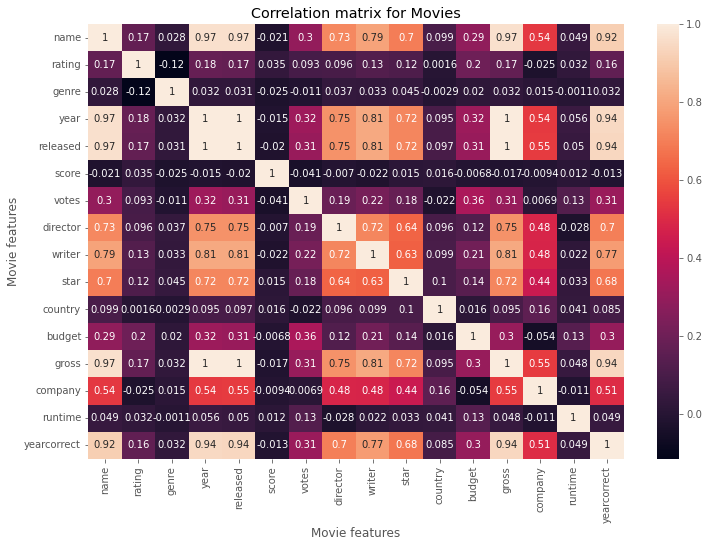

In [26]:
#We will again use heatmap to see how strong the relationship is by color

correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [27]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.023223
             genre          0.009459
             year           0.024759
             released      -0.005994
                              ...   
yearcorrect  budget         0.319599
             gross          0.268472
             company       -0.018192
             runtime        0.074579
             yearcorrect    1.000000
Length: 256, dtype: float64

In [28]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.368762
genre        budget        -0.368762
             gross         -0.244286
gross        genre         -0.244286
rating       budget        -0.186401
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [29]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross        votes          0.614991
votes        gross          0.614991
gross        budget         0.740729
budget       gross          0.740729
year         yearcorrect    0.998640
yearcorrect  year           0.998640
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Now we can conclude that votes and budget have the highest correlation with gross earnings